<a href="https://colab.research.google.com/github/karoldem/comicfinder/blob/master/new_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
import easyocr
reader = easyocr.Reader(['en'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.5 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
result = reader.readtext('https://imgs.xkcd.com/comics/iceberg.png')

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

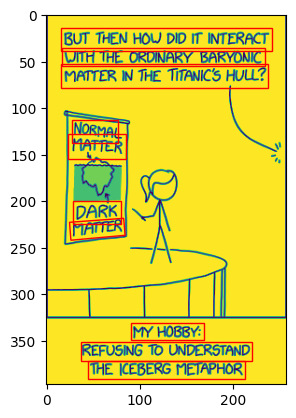

[([[16, 14], [242, 14], [242, 38], [16, 38]],
  'But THEN HOU DID IT INTERACT',
  0.5302930495349351),
 ([[17, 35], [235, 35], [235, 55], [17, 55]],
  'UITh THE ORDINARY BARYONIC',
  0.35056608560412617),
 ([[16, 52], [238, 52], [238, 78], [16, 78]],
  'MATTER IN THE TITANICS HULL?',
  0.4298277862131333),
 ([[27, 113], [77, 113], [77, 137], [27, 137]], 'NORMAL', 0.9393927569490526),
 ([[23, 128], [85, 128], [85, 154], [23, 154]], 'NATTER', 0.9345287858654616),
 ([[28, 200], [80, 200], [80, 224], [28, 224]], 'DARK', 0.9995521306991577),
 ([[91, 331], [169, 331], [169, 349], [91, 349]],
  'MY HOBBY:',
  0.9256055240630308),
 ([[37, 351], [221, 351], [221, 371], [37, 371]],
  'REFUSING TO UNDERSTAND',
  0.6984198535074471),
 ([[45, 371], [213, 371], [213, 391], [45, 391]],
  'THE ICEBERG METAPHOR',
  0.8253844216567787),
 ([[24.654654412007375, 222.52011985320812],
   [82.84718332700004, 218.23324465671698],
   [84.34534558799263, 236.47988014679188],
   [26.152816672999965, 241.76675534

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO

url = 'https://imgs.xkcd.com/comics/iceberg.png'
result = reader.readtext(url)
response = requests.get(url)
im = Image.open(BytesIO(response.content))

fig, ax = plt.subplots()
ax.imshow(im)

for i in result:
    ax.add_patch(patches.Polygon(i[0], linewidth=1, edgecolor='r', facecolor='none'))

plt.show()
result

In [4]:
result[1][0]

[[17, 35], [235, 35], [235, 55], [17, 55]]

In [5]:
from sympy import Point, Polygon

p1, p2, p3, p4 = map(Point, result[0][0])
p5, p6, p7, p8 = map(Point, result[1][0])

poly1 = Polygon(p1, p2, p3, p4)
poly2 = Polygon(p5, p6, p7, p8)

isIntersection = poly1.intersection(poly2)

print(isIntersection)

[Point2D(17, 38), Point2D(235, 38)]


In [9]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO

url = 'https://imgs.xkcd.com/comics/iceberg.png'
result = reader.readtext(url)
response = requests.get(url)
im = Image.open(BytesIO(response.content))

fig, ax = plt.subplots()
ax.imshow(im)

for i in result:
    ax.add_patch(patches.Polygon(i[0], linewidth=1, edgecolor='r', facecolor='none'))

plt.show()

reader.detect(url)

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

([[[16, 242, 14, 38],
   [17, 235, 35, 55],
   [16, 238, 52, 78],
   [27, 77, 113, 137],
   [23, 85, 128, 154],
   [28, 80, 200, 224],
   [91, 169, 331, 349],
   [37, 221, 351, 371],
   [45, 213, 371, 391]]],
 [[[[24.654654412007375, 222.52011985320812],
    [82.84718332700004, 218.23324465671698],
    [84.34534558799263, 236.47988014679188],
    [26.152816672999965, 241.76675534328302]]]])

In [10]:
r = reader.detect(url)

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

In [15]:
r[1][0]

[[[24.654654412007375, 222.52011985320812],
  [82.84718332700004, 218.23324465671698],
  [84.34534558799263, 236.47988014679188],
  [26.152816672999965, 241.76675534328302]]]